In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/finalbiodieseldataset/Compiled Dataset.xlsx


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load dataset
file_path = '/kaggle/input/finalbiodieseldataset/Compiled Dataset.xlsx' 
df = pd.read_excel(file_path)

In [8]:
df.describe()

,Molar Ratio(MeOH: Oil),Catalyst Dose(wt%),Reaction temp(°C),Reaction Time(hr),Biodiesel yield(%)
count,3016.000000,3013.000000,3010.000000,3007.000000,3018.000000
mean,10.962694,3.679183,72.612492,2.645923,84.376579
std,12.287028,4.884382,39.990529,3.398847,15.521182
min,0.000000,0.000000,20.000000,0.002833,0.000000
25%,6.000000,1.000000,55.000000,1.000000,79.492500
50%,9.000000,3.000000,60.000000,2.000000,89.630000
75%,14.000000,5.000000,70.000000,3.000000,95.010000
max,360.000000,99.000000,348.000000,90.000000,100.000000


In [9]:
df.isnull().sum()

Molar Ratio(MeOH: Oil)     5
Catalyst Dose(wt%)         8
Reaction temp(°C)         11
Reaction Time(hr)         14
Biodiesel yield(%)         3
dtype: int64

In [4]:
# Fill missing values with the median
df_filled = df.fillna(df.median(numeric_only=True))

/tmp/ipykernel_35/2357288124.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_35/2357288124.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_35/2357288124.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_35/2357288124.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


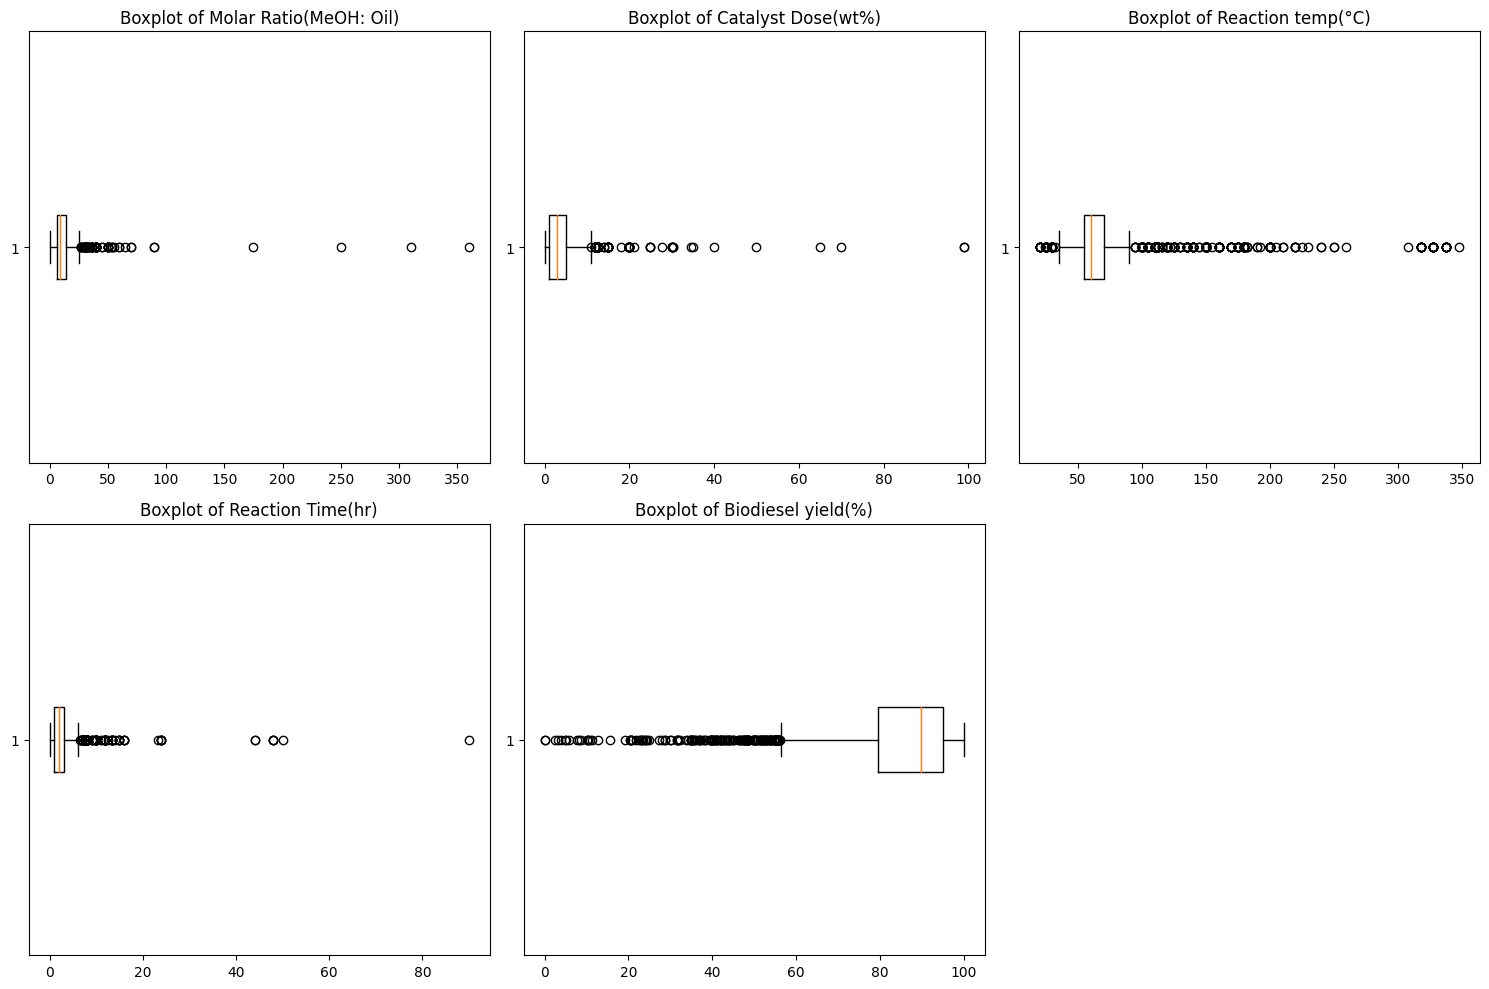

In [6]:
# Plot boxplots for each numerical column
numeric_cols = df_filled.select_dtypes(include='number').columns

plt.figure(figsize=(15, 5 * ((len(numeric_cols) + 2) // 3)))  # Adjusting plot size

for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i)
    plt.boxplot(df_filled[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [7]:
# Remove outliers using IQR method
def remove_outliers_iqr(df):
    df_clean = df.copy()
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

df_cleaned = remove_outliers_iqr(df_filled)

# Print new shape for verification
print("Shape after outlier removal:", df_cleaned.shape)

Shape after outlier removal: (2216, 5)


In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [11]:
# Select numeric columns
numeric_cols = df_cleaned.select_dtypes(include='number').columns

# Make a copy to preserve the original cleaned data
df_scaled = df_cleaned.copy()

# Step 1: Normalize (Min-Max Scaling)
min_max_scaler = MinMaxScaler()
df_scaled[numeric_cols] = min_max_scaler.fit_transform(df_scaled[numeric_cols])

# Step 2: Standardize (Z-score Scaling)
standard_scaler = StandardScaler()
df_scaled[numeric_cols] = standard_scaler.fit_transform(df_scaled[numeric_cols])

In [12]:
# Display scaled data sample
print(df_scaled.head())

   Molar Ratio(MeOH: Oil)  Catalyst Dose(wt%)  Reaction temp(°C)  \
0               -1.961170            0.861804           0.385782   
2               -0.113017            0.071532           0.881065   
3               -0.113017           -0.126036           0.385782   
4               -0.706601           -0.714788           0.385782   
5               -0.113017            0.071532           0.385782   

   Reaction Time(hr)  Biodiesel yield(%)  
0           0.399705            0.174164  
2           0.787875            1.019886  
3           0.787875            0.117209  
4           2.340555            1.044602  
5           3.116895            0.568547  


In [13]:
# Save the final processed dataset to an Excel file
output_file = 'Fully_Preprocessed_Compiled_Dataset.xlsx'
df_scaled.to_excel(output_file, index=False)

print(f"Dataset successfully saved to: {output_file}")

Dataset successfully saved to: Fully_Preprocessed_Compiled_Dataset.xlsx
